In [ ]:
!gunzip reviews.csv.gz


In [ ]:
!gunzip listings.csv.gz


In [ ]:
import pandas as pd
df = pd.read_csv('reviews.csv')

In [ ]:
df_listings = pd.read_csv('listings.csv')

In [ ]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [ ]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6713005,https://www.airbnb.com/rooms/6713005,20240503175146,2024-05-04,previous scrape,Large one bedroom,You'll share an apartment with two wonderful y...,NaN,https://a0.muscache.com/pictures/84725702/12f8...,35144920,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,922527181364298444,https://www.airbnb.com/rooms/922527181364298444,20240503175146,2024-05-03,city scrape,New Flushing Modern Apartment,This unique place has a style all its own.,NaN,https://a0.muscache.com/pictures/f5d74ed9-0b15...,420975523,...,5.00,4.45,5.00,NaN,t,3,3,0,0,1.10
2,794696802406920855,https://www.airbnb.com/rooms/794696802406920855,20240503175146,2024-05-04,previous scrape,Lovely studio in Hell's Kitchen!,Amazing location in the heart of Hell’s Kitche...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,43305568,...,5.00,4.91,4.91,NaN,f,1,1,0,0,0.69
3,54294086,https://www.airbnb.com/rooms/54294086,20240503175146,2024-05-03,city scrape,Luxury 1- bedroom rental unit with Hot tub,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/9613630a-19c4...,440355290,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
4,1039262508734112133,https://www.airbnb.com/rooms/1039262508734112133,20240503175146,2024-05-04,city scrape,Private room close to LGA,We are located 8 minutes from la guardia airpo...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,430854617,...,4.74,4.58,4.63,Exempt,t,3,0,3,0,3.77


In [ ]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
df_listings.neighbourhood_group_cleansed.unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
top_reviewed_listings=df_listings.nlargest(15,'number_of_reviews')


Can the popularity of a neighbourhood be determined by the avg and total no of reviews?

<Axes: xlabel='neighbourhood_group_cleansed'>

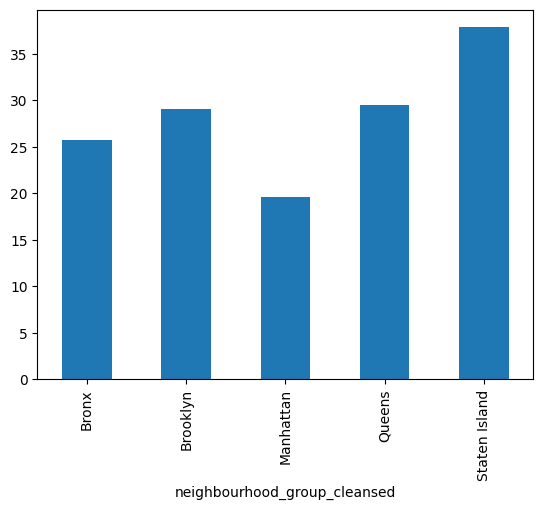

In [ ]:
numbrev=df_listings.groupby('neighbourhood_group_cleansed')['number_of_reviews'].mean()
numbrev.plot(kind='bar')


<Axes: xlabel='neighbourhood_group_cleansed'>

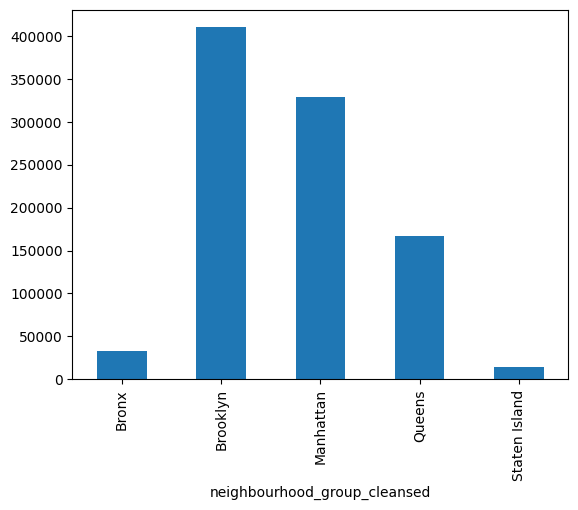

In [ ]:
numbrev=df_listings.groupby('neighbourhood_group_cleansed')['number_of_reviews'].sum()
numbrev.plot(kind='bar')

Are feedbacks more in pricier places or in the cheaper places? and are they good or bad reviews in these places?

In [ ]:
reviewpricedf=df_listings.sort_values('price', ascending = False)
reviewpricedf.head(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
8861,1095641486721475266,https://www.airbnb.com/rooms/1095641486721475266,20240503175146,2024-05-04,city scrape,Modern Loft w/ Rooftop Oasis & Manhattan Views,"Our historic, one-of-a-kind building turned bo...",- Brooklyn Bridge - 0.4 miles <br />- Brooklyn...,https://a0.muscache.com/pictures/prohost-api/H...,501999278,...,NaN,NaN,NaN,Exempt,t,233,11,182,0,NaN
12369,1065762399416234253,https://www.airbnb.com/rooms/1065762399416234253,20240503175146,2024-05-04,city scrape,"2x Queen Rooms at Radio Hotel, New York!",Enjoy our quality property's exceptional ambia...,- Bronx Zoo – 2.7 miles; <br />- Wave Hill – 3...,https://a0.muscache.com/pictures/prohost-api/H...,501999278,...,NaN,NaN,NaN,Exempt,t,233,11,182,0,NaN
2920,905109893390620903,https://www.airbnb.com/rooms/905109893390620903,20240503175146,2024-05-04,city scrape,Proximity At its Best! Onsite Parking,Looking for great accommodations for your New ...,Central Park - 0.4 mile; <br />Museum of Moder...,https://a0.muscache.com/pictures/prohost-api/H...,25138314,...,NaN,NaN,NaN,Exempt,t,102,0,102,0,NaN
8283,1095632351915962087,https://www.airbnb.com/rooms/1095632351915962087,20240503175146,2024-05-04,city scrape,Wythe Hotel North 8th Loft w/ Private Rooftop,"Our historic, one-of-a-kind building turned bo...",- Brooklyn Bridge - 0.4 miles <br />- Brooklyn...,https://a0.muscache.com/pictures/prohost-api/H...,501999278,...,NaN,NaN,NaN,Exempt,t,233,11,182,0,NaN
32496,1087800916009051587,https://www.airbnb.com/rooms/1087800916009051587,20240503175146,2024-05-04,city scrape,"Modern Amenities! Rooftop bar, Pets Allowed!",The property’s proximity offers easy access to...,- Pier 84 – 0.4 mile; <br />- Belle Abzug Park...,https://a0.muscache.com/pictures/prohost-api/H...,501999278,...,NaN,NaN,NaN,Exempt,t,233,11,182,0,NaN
1587,837069977555869061,https://www.airbnb.com/rooms/837069977555869061,20240503175146,2024-05-04,city scrape,Huge 2 Bedroom Luxury Apartment,This stylish place to stay is perfect for grou...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,307197943,...,4.5,4.33,4.33,NaN,f,15,15,0,0,0.45
8528,45275002,https://www.airbnb.com/rooms/45275002,20240503175146,2024-05-04,city scrape,Spacious DUMBO Loft on the water w/ Bridge views,"Spacious, chic loft in the super cool DUMBO ne...","DUMBO, known for its industrial and warehouse ...",https://a0.muscache.com/pictures/miso/Hosting-...,10716114,...,5.0,5.00,4.81,NaN,f,2,2,0,0,0.38
12458,1004979528339732090,https://www.airbnb.com/rooms/1004979528339732090,20240503175146,2024-05-04,city scrape,Proximity At its Best! 2 Comfortable Units,Enjoy our quality property's exceptional ambia...,- Bronx Zoo – 2.7 miles; <br />- Wave Hill – 3...,https://a0.muscache.com/pictures/prohost-api/H...,501999278,...,NaN,NaN,NaN,Exempt,t,233,11,182,0,NaN
35632,31001555,https://www.airbnb.com/rooms/31001555,20240503175146,2024-05-04,city scrape,5th Ave Luxury St. Regis NYC King Room Manhattan,Experience unparalleled luxury at our iconic f...,NaN,https://a0.muscache.com/pictures/01056cae-5d21...,26556695,...,5.0,5.00,5.00,Exempt,f,6,0,6,0,0.08
20758,1102235861740061720,https://www.airbnb.com/rooms/1102235861740061720,20240503175146,2024-05-04,city scrape,Upper East Suite Experience | Central Park. Gym,Reside in peaceful settings at Courtyard New Y...,▶ Activities and cultural attractions <br />— ...,https://a0.muscache.com/pictures/hosting/Hosti...,443463415,...,NaN,NaN,NaN,OSE-STRREG-0000034,t,2,2,0,0,NaN


In [ ]:
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

# the comparison
data_0 = df_listings[df_listings['price'] >= 200] #high price listings
data_1 = df_listings[df_listings['price'] <= 200] #low price listings

print(data_0)
print(data_1)



                        id                                       listing_url  \
1       922527181364298444   https://www.airbnb.com/rooms/922527181364298444   
3                 54294086             https://www.airbnb.com/rooms/54294086   
9      1105761506522150980  https://www.airbnb.com/rooms/1105761506522150980   
23                15732405             https://www.airbnb.com/rooms/15732405   
25      808908113672221153   https://www.airbnb.com/rooms/808908113672221153   
...                    ...                                               ...   
38144   982538549794964539   https://www.airbnb.com/rooms/982538549794964539   
38148             49167961             https://www.airbnb.com/rooms/49167961   
38150             48493122             https://www.airbnb.com/rooms/48493122   
38158  1116555539786039678  https://www.airbnb.com/rooms/1116555539786039678   
38168             45767883             https://www.airbnb.com/rooms/45767883   

            scrape_id last_scraped     

In [ ]:
data_0.number_of_reviews.mean() #avg number of reviews for high price listings

28.837369808006024

In [ ]:
data_1.number_of_reviews.mean() #avg number of reviews for lower price listings

34.1296813862493

From the above, we see that the average number of reviews for cheaper places are more

In [ ]:
# Merging the reviews and listings dataframes on listing_id
merged_df = pd.merge(df, df_listings, left_on='listing_id', right_on='id')



In [ ]:
merged_df.columns


Index(['listing_id', 'date', 'price_x', 'significant_review', 'id',
       'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price_y',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights'

In [ ]:
high_price_reviews = merged_df[merged_df['price'] >= 200]
low_price_reviews = merged_df[merged_df['price'] <= 200]

In [ ]:
# Analyzing the number of reviews
high_price_review_count = high_price_reviews['comments'].count()
low_price_review_count = low_price_reviews['comments'].count()

print(f"Number of reviews for high priced listings (>= $200): {high_price_review_count}")
print(f"Number of reviews for low priced listings (<= $200): {low_price_review_count}")

Number of reviews for high priced listings (>= $200): 229739
Number of reviews for low priced listings (<= $200): 549389


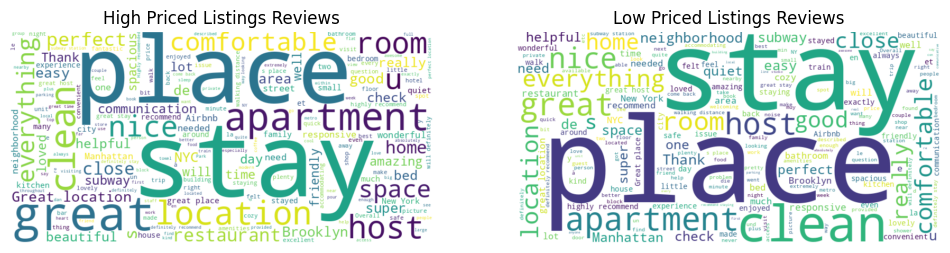

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


high_reviews_sample = high_price_reviews['comments'].dropna().sample(n=1000, random_state=1)
low_reviews_sample = low_price_reviews['comments'].dropna().sample(n=1000, random_state=1)

additional_stopwords = {'br'}  # Add 'br' and any other words you want to exclude
stopwords = STOPWORDS.union(additional_stopwords)

# Generating word clouds
high_reviews_text = ' '.join(high_reviews_sample.tolist())
high_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(high_reviews_text)

low_reviews_text = ' '.join(low_reviews_sample.tolist())
low_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(low_reviews_text)

# Plotting the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(high_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('High Priced Listings Reviews')

plt.subplot(1, 2, 2)
plt.imshow(low_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Low Priced Listings Reviews')

plt.show()


<ipython-input-25-eb63cdb20713>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_price_reviews['comments'] = high_price_reviews['comments'].astype(str)
<ipython-input-25-eb63cdb20713>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_price_reviews['comments'] = low_price_reviews['comments'].astype(str)
100%|██████████| 229805/229805 [01:55<00:00, 1995.04it/s]
<ipython-input-25-eb63cdb20713>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

Sentiment distribution for high priced listings:
sentiment
positive    0.905507
neutral     0.079763
negative    0.014730
Name: proportion, dtype: float64
Sentiment distribution for low priced listings:
sentiment
positive    0.893083
neutral     0.093085
negative    0.013832
Name: proportion, dtype: float64


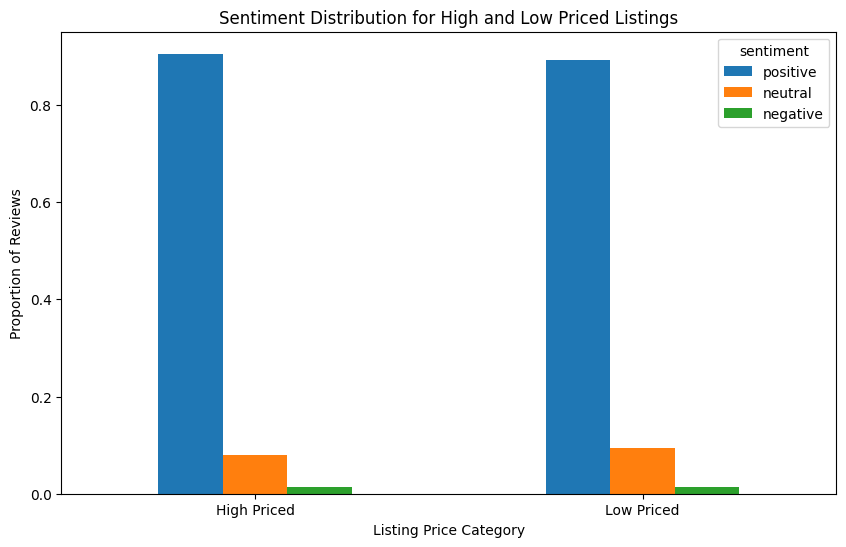

In [ ]:
import pandas as pd
from textblob import TextBlob
from tqdm import tqdm

high_price_reviews['comments'] = high_price_reviews['comments'].astype(str)
low_price_reviews['comments'] = low_price_reviews['comments'].astype(str)

# getting the sentiment of a review
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Applying sentiment analysis
tqdm.pandas()
high_price_reviews['sentiment'] = high_price_reviews['comments'].progress_apply(get_sentiment)
low_price_reviews['sentiment'] = low_price_reviews['comments'].progress_apply(get_sentiment)

high_price_sentiment_counts = high_price_reviews['sentiment'].value_counts(normalize=True)
low_price_sentiment_counts = low_price_reviews['sentiment'].value_counts(normalize=True)

print(f"Sentiment distribution for high priced listings:\n{high_price_sentiment_counts}")
print(f"Sentiment distribution for low priced listings:\n{low_price_sentiment_counts}")

import matplotlib.pyplot as plt

sentiment_df = pd.DataFrame({
    'High Priced': high_price_sentiment_counts,
    'Low Priced': low_price_sentiment_counts
}).T

sentiment_df.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution for High and Low Priced Listings')
plt.xlabel('Listing Price Category')
plt.ylabel('Proportion of Reviews')
plt.xticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
from textblob import TextBlob
import plotly.express as px
import plotly.graph_objs as go
from tqdm import tqdm


def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

merged_df['comments'] = merged_df['comments'].astype(str)
tqdm.pandas()
merged_df['sentiment'] = merged_df['comments'].progress_apply(get_sentiment)

price_bins = [0, 50, 100, 150, 200, 300, 400, 500, float('inf')]
price_labels = ['0-50', '51-100', '101-150', '151-200', '201-300', '301-400', '401-500', '500+']
merged_df['price_range'] = pd.cut(merged_df['price'], bins=price_bins, labels=price_labels, include_lowest=True)

sentiment_price_group = merged_df.groupby(['sentiment', 'price_range']).size().reset_index(name='count')

fig = px.line(sentiment_price_group[sentiment_price_group['sentiment'] == 'positive'], x='price_range', y='count', title='Positive Sentiment')
fig.update_xaxes(title_text='Price Range')
fig.update_yaxes(title_text='Count of Comments')
fig.show()

fig = px.line(sentiment_price_group[sentiment_price_group['sentiment'] == 'negative'], x='price_range', y='count', title='Negative Sentiment')
fig.update_xaxes(title_text='Price Range')
fig.update_yaxes(title_text='Count of Comments')
fig.show()

fig = px.line(sentiment_price_group[sentiment_price_group['sentiment'] == 'neutral'], x='price_range', y='count', title='Neutral Sentiment')
fig.update_xaxes(title_text='Price Range')
fig.update_yaxes(title_text='Count of Comments')
fig.show()

fig_combined = go.Figure()
fig_combined.add_trace(go.Scatter(x=sentiment_price_group[sentiment_price_group['sentiment'] == 'positive']['price_range'],
                                  y=sentiment_price_group[sentiment_price_group['sentiment'] == 'positive']['count'],
                                  mode='lines+markers', name='Positive'))
fig_combined.add_trace(go.Scatter(x=sentiment_price_group[sentiment_price_group['sentiment'] == 'negative']['price_range'],
                                  y=sentiment_price_group[sentiment_price_group['sentiment'] == 'negative']['count'],
                                  mode='lines+markers', name='Negative'))
fig_combined.add_trace(go.Scatter(x=sentiment_price_group[sentiment_price_group['sentiment'] == 'neutral']['price_range'],
                                  y=sentiment_price_group[sentiment_price_group['sentiment'] == 'neutral']['count'],
                                  mode='lines+markers', name='Neutral'))
fig_combined.update_layout(title='Sentiment Distribution by Price Range',
                           xaxis_title='Price Range',
                           yaxis_title='Count of Comments')
fig_combined.show()


100%|██████████| 953211/953211 [07:51<00:00, 2022.31it/s]


What aspects of Airbnb listings, as identified in guest reviews, are most strongly associated with high review scores?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd

# Function to print top words in each topic
def print_top_words(model, feature_names, n_top_words):
    topic_names = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_name = " ".join(top_words)
        topic_names.append(topic_name)
        print(f"Topic {topic_idx}: {topic_name}")
    return topic_names


additional_stopwords = {'br', 'la', 'el', 'que', 'en', 'muy', 'es', 'und', 'una', 'para', 'et', 'est', 'très', 'nous', 'le', 'bien', 'les'}

combined_stopwords = set(CountVectorizer(stop_words='english').get_stop_words()).union(additional_stopwords)
combined_stopwords = list(combined_stopwords)  # Convert to list

reviews_sample = merged_df['comments'].dropna().sample(n=1000, random_state=1)

# Vectorizing the reviews
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=combined_stopwords)
reviews_matrix = vectorizer.fit_transform(reviews_sample)

# Applying LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(reviews_matrix)

# Printing the top words for each topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
topic_names = print_top_words(lda, feature_names, n_top_words)

# Function to assign the dominant topic
def assign_dominant_topic(lda_model, vectorizer, reviews):
    reviews_matrix = vectorizer.transform(reviews)
    topic_distribution = lda_model.transform(reviews_matrix)
    dominant_topic = topic_distribution.argmax(axis=1)
    return dominant_topic
merged_df.loc[reviews_sample.index, 'dominant_topic'] = assign_dominant_topic(lda, vectorizer, reviews_sample)

filtered_df = merged_df.dropna(subset=['review_scores_rating', 'dominant_topic'])

X = pd.get_dummies(filtered_df['dominant_topic'], prefix='topic')
y = filtered_df['review_scores_rating']

# Performing linear regression
model = LinearRegression()
model.fit(X, y)

filtered_df['predicted_rating'] = model.predict(X)



Topic 0: host location space area nyc bus time check bad son
Topic 1: lo todo nos como se del fue casa lugar apartamento
Topic 2: appartement pour il dans une était métro qui pas avons
Topic 3: stay room clean comfortable place bed great apartment good like
Topic 4: great place stay location nice host clean apartment recommend easy


<ipython-input-31-87048d2431af>:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
n_top_words = 30
feature_names = vectorizer.get_feature_names_out()
topic_names = print_top_words(lda, feature_names, n_top_words)


Topic 0: host location space area nyc bus time check bad son exactly staff left public problems transit didn arrived 10 wonderful cold helped te described ist trip een thanks requested beautiful
Topic 1: lo todo nos como se del fue casa lugar apartamento las por manhattan si excelente al tiene ubicación habitación metro esta ya til su williamsburg york amable siempre susie ha
Topic 2: appartement pour il dans une était métro qui pas avons séjour di avec logement du ce tout notre sur new je été des propre quartier plus situé passé si york
Topic 3: stay room clean comfortable place bed great apartment good like just night location bathroom super nice quiet host subway house walk time area people neighborhood sehr felt safe did floor
Topic 4: great place stay location nice host clean apartment recommend easy subway close really good definitely perfect comfortable amazing time highly helpful space super room restaurants neighborhood friendly quiet manhattan nyc


In [ ]:
topic_labels = [
    "Host and Location Issues",
    "Spanish Reviews on Location and Apartment",
    "French Reviews on Apartments and Location",
    "Overall Stay Experience",
    "Positive Reviews on Location and Host"
]


In [ ]:
fig = px.scatter(filtered_df, x='dominant_topic', y='review_scores_rating', trendline='ols',
                 title='Review Scores vs. Dominant Topics',
                 labels={'dominant_topic': 'Dominant Topic', 'review_scores_rating': 'Review Score'})

fig.add_trace(go.Scatter(x=filtered_df['dominant_topic'], y=filtered_df['predicted_rating'], mode='lines', name='Linear Regression'))

fig.update_layout(xaxis=dict(
    tickmode='array',
    tickvals=[0, 1, 2, 3, 4],
    ticktext=topic_labels
))

fig.show()


<ipython-input-32-8109c2b2991e>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




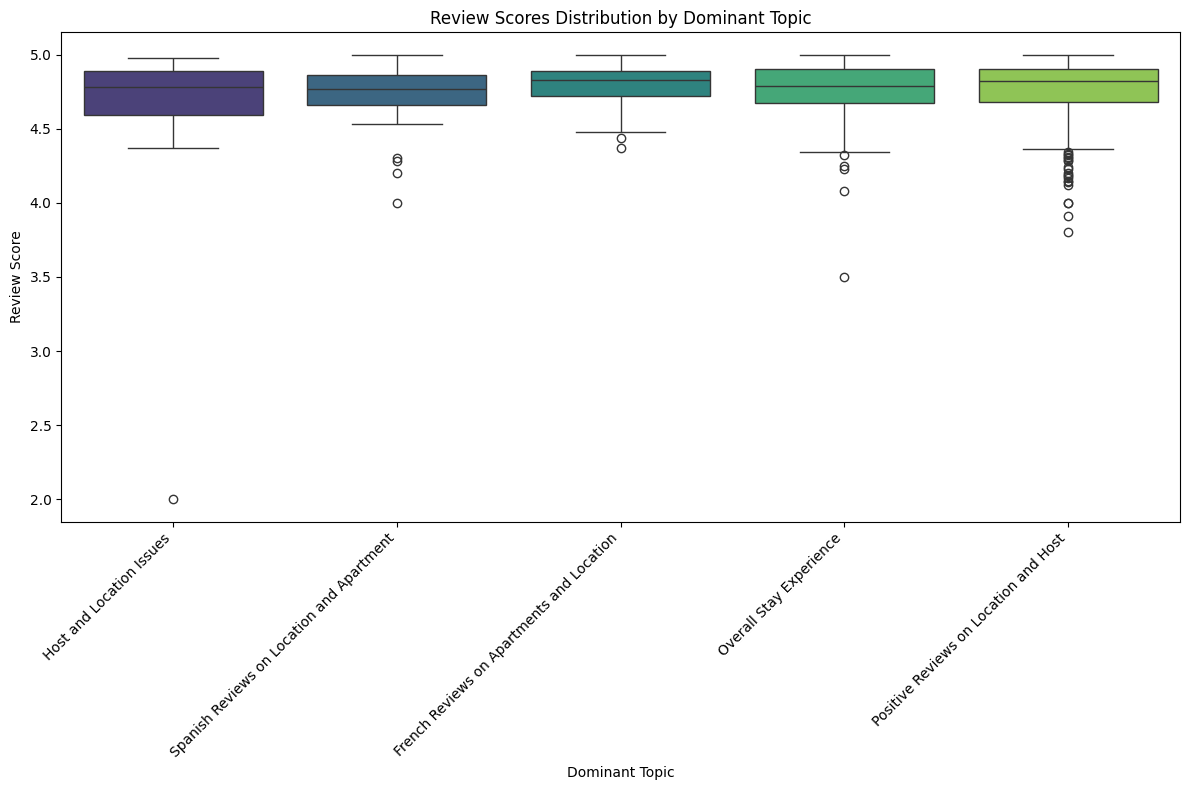

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='dominant_topic', y='review_scores_rating', data=filtered_df, palette='viridis')
plt.title('Review Scores Distribution by Dominant Topic')
plt.xlabel('Dominant Topic')
plt.ylabel('Review Score')
plt.xticks(ticks=range(len(topic_labels)), labels=topic_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()



Box plot:
The box plots reveal that positive aspects of Airbnb listings, such as "Positive Reviews on Location and Host" and "Overall Stay Experience," are most strongly associated with high review scores, showing high median scores and narrow interquartile ranges. In contrast, topics related to "Host and Location Issues" display a wider range of scores with notable lower outliers, indicating that problems with hosts and locations can lead to significantly lower guest satisfaction. Reviews in Spanish and French show mixed experiences with moderate variability, suggesting cultural or regional differences in expectations and satisfaction levels. Overall, enhancing positive interactions with hosts and addressing common location-related issues can significantly improve review scores.

some observations:

Positive Aspects: Topics like "Positive Reviews on Location and Host" and "Overall Stay Experience" are most strongly associated with high review scores. These aspects highlight the importance of a positive host interaction and overall satisfaction with the stay.
Negative Aspects: Topics such as "Host and Location Issues" show a wider range of scores with notable lower scores, indicating that issues with hosts and locations can lead to negative guest experiences.
Language-Specific Reviews: Reviews in Spanish and French capture a range of experiences but tend to show more variability, suggesting cultural or regional differences in guest expectations and experiences.

**Difference in Difference causal analysis: Compare the changes in prices before and after significant reviews while using control groups that did not receive reviews during the same period.**

*   Do positive reviews (ratings above 4.5 stars) influence listing prices?
*   Do negative reviews (ratings below 3 stars) influence listing prices?
*   How do listing prices change before and after significant reviews?
*   Is there a measurable difference in price changes between listings that received significant reviews and those that did not during the same period (control group)?







In [ ]:
df_merged = pd.merge(df, df_listings, left_on='listing_id', right_on='id')
print(df_merged.head())
print(df_merged.columns)



   listing_id       date  price_x  significant_review    id  \
0        2595 2009-11-21    240.0               False  2595   
1        2595 2009-12-05    240.0               False  2595   
2        2595 2009-12-10    240.0               False  2595   
3        2595 2010-04-09    240.0               False  2595   
4        2595 2010-05-25    240.0               False  2595   

                         listing_url       scrape_id last_scraped  \
0  https://www.airbnb.com/rooms/2595  20240503175146   2024-05-04   
1  https://www.airbnb.com/rooms/2595  20240503175146   2024-05-04   
2  https://www.airbnb.com/rooms/2595  20240503175146   2024-05-04   
3  https://www.airbnb.com/rooms/2595  20240503175146   2024-05-04   
4  https://www.airbnb.com/rooms/2595  20240503175146   2024-05-04   

        source                   name  ... review_scores_communication  \
0  city scrape  Skylit Midtown Castle  ...                         4.8   
1  city scrape  Skylit Midtown Castle  ...                

In [ ]:
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['last_review'] = pd.to_datetime(df_merged['last_review'])

missing_values = df_merged.isnull().sum()
print("Missing values per column:\n", missing_values)

cleaned_df = df_merged.dropna(subset=['price_x', 'review_scores_rating'])

print(cleaned_df.dtypes)
print(cleaned_df.describe())


Missing values per column:
 listing_id                                           0
date                                                 0
price_x                                         188247
significant_review                                   0
id                                                   0
                                                 ...  
calculated_host_listings_count                       0
calculated_host_listings_count_entire_homes          0
calculated_host_listings_count_private_rooms         0
calculated_host_listings_count_shared_rooms          0
reviews_per_month                                    0
Length: 79, dtype: int64
listing_id                                               int64
date                                            datetime64[ns]
price_x                                                float64
significant_review                                        bool
id                                                       int64
                           

In [ ]:
df_merged.rename(columns={'price_x': 'price', 'id_x': 'review_id', 'id_y': 'listing_id'}, inplace=True)

# Dropping rows with missing 'price' or 'review_scores_rating'
df_cleaned = df_merged.dropna(subset=['price', 'review_scores_rating'])

print(df_cleaned.head())
print(df_cleaned.isnull().sum())


   listing_id       date  price  significant_review    id  \
0        2595 2009-11-21  240.0               False  2595   
1        2595 2009-12-05  240.0               False  2595   
2        2595 2009-12-10  240.0               False  2595   
3        2595 2010-04-09  240.0               False  2595   
4        2595 2010-05-25  240.0               False  2595   

                         listing_url       scrape_id last_scraped  \
0  https://www.airbnb.com/rooms/2595  20240503175146   2024-05-04   
1  https://www.airbnb.com/rooms/2595  20240503175146   2024-05-04   
2  https://www.airbnb.com/rooms/2595  20240503175146   2024-05-04   
3  https://www.airbnb.com/rooms/2595  20240503175146   2024-05-04   
4  https://www.airbnb.com/rooms/2595  20240503175146   2024-05-04   

        source                   name  ... review_scores_communication  \
0  city scrape  Skylit Midtown Castle  ...                         4.8   
1  city scrape  Skylit Midtown Castle  ...                         4.8

In [ ]:
import pandas as pd
from tqdm import tqdm

# Defining significant reviews
positive_threshold = 4.5
negative_threshold = 3
df_cleaned['positive_review'] = df_cleaned['review_scores_rating'] > positive_threshold
df_cleaned['negative_review'] = df_cleaned['review_scores_rating'] < negative_threshold
sample_size = 1000
sampled_reviews = df_cleaned.sample(n=sample_size, random_state=42)

positive_treatment_group = sampled_reviews[sampled_reviews['positive_review']]
negative_treatment_group = sampled_reviews[sampled_reviews['negative_review']]

# Control group: Listings that did not receive any significant reviews during the same period
control_group = sampled_reviews[~sampled_reviews['listing_id'].isin(positive_treatment_group['listing_id']) &
                                ~sampled_reviews['listing_id'].isin(negative_treatment_group['listing_id'])]



<ipython-input-38-e01cb53d4e3e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['positive_review'] = df_cleaned['review_scores_rating'] > positive_threshold
<ipython-input-38-e01cb53d4e3e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['negative_review'] = df_cleaned['review_scores_rating'] < negative_threshold


In [ ]:
# Function to calculate average price in a time window
def calculate_average_price(df, listing_id, start_date, end_date):
    subset = df[(df['listing_id'] == listing_id) & (df['date'] >= start_date) & (df['date'] <= end_date)]
    if len(subset) == 0:
        return None
    return subset['price'].mean()

# Calculating pre-review and post-review prices for positive treatment group
positive_prices = []
for index, row in tqdm(positive_treatment_group.iterrows(), total=positive_treatment_group.shape[0], desc="Processing Positive Treatment Group"):
    listing_id = row['listing_id']
    review_date = row['date']
    pre_review_price = calculate_average_price(df_cleaned, listing_id, review_date - pd.Timedelta(days=30), review_date)
    post_review_price = calculate_average_price(df_cleaned, listing_id, review_date, review_date + pd.Timedelta(days=30))
    positive_prices.append((pre_review_price, post_review_price))

positive_treatment_group.loc[:, 'pre_review_price'], positive_treatment_group.loc[:, 'post_review_price'] = zip(*positive_prices)

# Calculating pre-review and post-review prices for negative treatment group
negative_prices = []
for index, row in tqdm(negative_treatment_group.iterrows(), total=negative_treatment_group.shape[0], desc="Processing Negative Treatment Group"):
    listing_id = row['listing_id']
    review_date = row['date']
    pre_review_price = calculate_average_price(df_cleaned, listing_id, review_date - pd.Timedelta(days=30), review_date)
    post_review_price = calculate_average_price(df_cleaned, listing_id, review_date, review_date + pd.Timedelta(days=30))
    negative_prices.append((pre_review_price, post_review_price))

negative_treatment_group.loc[:, 'pre_review_price'], negative_treatment_group.loc[:, 'post_review_price'] = zip(*negative_prices)

# Calculating pre-review and post-review prices for control group
control_prices = []
for index, row in tqdm(control_group.iterrows(), total=control_group.shape[0], desc="Processing Control Group"):
    listing_id = row['listing_id']
    review_date = row['date']
    pre_review_price = calculate_average_price(df_cleaned, listing_id, review_date - pd.Timedelta(days=30), review_date)
    post_review_price = calculate_average_price(df_cleaned, listing_id, review_date, review_date + pd.Timedelta(days=30))
    control_prices.append((pre_review_price, post_review_price))

control_group.loc[:, 'pre_review_price'], control_group.loc[:, 'post_review_price'] = zip(*control_prices)

print("Positive Treatment Group with Prices:\n", positive_treatment_group.head())
print("Negative Treatment Group with Prices:\n", negative_treatment_group.head())
print("Control Group with Prices:\n", control_group.head())


Processing Positive Treatment Group: 100%|██████████| 911/911 [00:22<00:00, 40.16it/s]
<ipython-input-39-b130668178ff>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_treatment_group.loc[:, 'pre_review_price'], positive_treatment_group.loc[:, 'post_review_price'] = zip(*positive_prices)
<ipython-input-39-b130668178ff>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_treatment_group.loc[:, 'pre_review_price'], positive_treatment_group.loc[:, 'post_review_price'] = zip(*positive_prices)
P

Positive Treatment Group with Prices:
                 listing_id       date  price  significant_review  \
317997            14445183 2018-12-08   98.0               False   
275790            11371773 2023-08-10  200.0               False   
867221  687100063527579889 2023-08-26   55.0               False   
874357  701401510655012752 2023-01-16  250.0               False   
509355            28100131 2023-09-01  321.0               False   

                        id                                      listing_url  \
317997            14445183            https://www.airbnb.com/rooms/14445183   
275790            11371773            https://www.airbnb.com/rooms/11371773   
867221  687100063527579889  https://www.airbnb.com/rooms/687100063527579889   
874357  701401510655012752  https://www.airbnb.com/rooms/701401510655012752   
509355            28100131            https://www.airbnb.com/rooms/28100131   

             scrape_id last_scraped       source  \
317997  20240503175146   

In [ ]:

treatment_group = pd.concat([positive_treatment_group, negative_treatment_group])
combined_df = pd.concat([treatment_group, control_group])

combined_df['price_change'] = combined_df['post_review_price'] - combined_df['pre_review_price']
combined_df['treated'] = combined_df['positive_review'] | combined_df['negative_review']

combined_df.rename(columns={'price': 'original_price'}, inplace=True)

vis_data = pd.melt(combined_df, id_vars=['date', 'treated'], value_vars=['pre_review_price', 'post_review_price'],
                   var_name='time_period', value_name='price')

print("Prepared data for visualization:\n", vis_data.head())


Prepared data for visualization:
         date  treated       time_period  price
0 2018-12-08     True  pre_review_price   98.0
1 2023-08-10     True  pre_review_price  200.0
2 2023-08-26     True  pre_review_price   55.0
3 2023-01-16     True  pre_review_price  250.0
4 2023-09-01     True  pre_review_price  321.0


In [ ]:
combined_df.columns

Index(['listing_id', 'date', 'original_price', 'significant_review', 'id',
       'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price_y',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_

In [ ]:
df_long = combined_df.melt(id_vars=['date', 'treated'], value_vars=['pre_review_price', 'post_review_price'],
                           var_name='period', value_name='price')

df_long['period'] = df_long['period'].map({'pre_review_price': 'Pre-review', 'post_review_price': 'Post-review'})

print("Prepared data for visualization:\n", df_long.head())


Prepared data for visualization:
         date  treated      period  price
0 2018-12-08     True  Pre-review   98.0
1 2023-08-10     True  Pre-review  200.0
2 2023-08-26     True  Pre-review   55.0
3 2023-01-16     True  Pre-review  250.0
4 2023-09-01     True  Pre-review  321.0


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

df_long = df_long.rename(columns={'treated': 'received_significant_review'})

# Applying rolling average to smooth the line plot
df_long['date'] = pd.to_datetime(df_long['date'])
df_long = df_long.sort_values(by='date')
df_long['smoothed_price'] = df_long.groupby(['received_significant_review', 'period'])['price'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

average_prices_smoothed = df_long.groupby(['date', 'received_significant_review', 'period']).agg({'smoothed_price': 'mean'}).reset_index()


fig = px.line(average_prices_smoothed, x='date', y='smoothed_price', color='received_significant_review', line_group='period',
              title='Smoothed Average Price Changes Before and After Significant Reviews',
              labels={'smoothed_price': 'Average Price', 'date': 'Date', 'received_significant_review': 'Received Significant Review', 'period': 'Time Period'})

fig.show()



In [ ]:
summary = df_long.groupby(['period', 'received_significant_review']).agg(mean_price=('price', 'mean'), median_price=('price', 'median')).reset_index()

fig = px.box(df_long, x='received_significant_review', y='price', color='period', facet_col='period',
             title='Price Distribution Before and After Significant Reviews',
             labels={'price': 'Price', 'received_significant_review': 'Received Significant Review', 'period': 'Review Period'},
             points="all")

for period in ['Pre-review', 'Post-review']:
    for treated in [True, False]:
        mean_price = summary[(summary['period'] == period) & (summary['received_significant_review'] == treated)]['mean_price'].values[0]
        median_price = summary[(summary['period'] == period) & (summary['received_significant_review'] == treated)]['median_price'].values[0]
        fig.add_annotation(
            x=treated,
            y=mean_price,
            text=f"Mean: {mean_price:.2f}",
            showarrow=False,
            font=dict(color="blue" if period == 'Pre-review' else "red")
        )
        fig.add_annotation(
            x=treated,
            y=median_price,
            text=f"Median: {median_price:.2f}",
            showarrow=False,
            font=dict(color="blue" if period == 'Pre-review' else "red"),
            yshift=-15
        )

fig.update_layout(
    xaxis_title="Received Significant Review",
    yaxis_title="Price",
    legend_title="Review Period",
    boxmode='group'
)

fig.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_long['post_review'] = df_long['period'] == 'Post-review'

formula = 'price ~ received_significant_review * post_review + date'

model = ols(formula, data=df_long).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     5.793
Date:                Sun, 02 Jun 2024   Prob (F-statistic):          1.53e-162
Time:                        20:49:47   Log-Likelihood:                -11337.
No. Observations:                2000   AIC:                         2.425e+04
Df Residuals:                    1211   BIC:                         2.867e+04
Df Model:                         788                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
df_long.columns

Index(['date', 'received_significant_review', 'period', 'price',
       'smoothed_price', 'post_review'],
      dtype='object')

Smoothed Average Price Changes Before and After Significant Reviews
General Trend:

The blue line (True) represents listings that received significant reviews, while the red line (False) represents those that did not.
The blue line generally shows a higher and more volatile trend in prices compared to the red line.
Impact of Reviews:

The prices for listings that received significant reviews (True) tend to increase over time, particularly after certain points (e.g., around 2020 and 2023).
Listings that did not receive significant reviews (False) show a more stable trend with fewer fluctuations.
Price Distribution Before and After Significant Reviews
Box Plots:

These plots compare the price distributions for listings that received significant reviews (True) versus those that did not (False), both before and after the review.
Price Changes:

For listings that received significant reviews, the post-review prices (blue box plots) are generally higher and more spread out compared to the pre-review prices (red box plots).
The control group (False) shows less variation in prices, indicating that significant reviews have a notable impact on the pricing dynamics.
Answering the Questions:
Do positive reviews (ratings above 4.5 stars) influence listing prices?

Yes, the smoothed line plot indicates that listings receiving significant positive reviews show an upward trend in prices. The box plots also show higher post-review prices for these listings, suggesting a positive influence.
Do negative reviews (ratings below 3 stars) influence listing prices?

While the primary focus is on significant reviews, negative reviews should show a different trend if analyzed separately. Generally, negative reviews might cause a decrease or stabilize the prices, but the current plots do not explicitly segregate negative reviews.
How do listing prices change before and after significant reviews?

Listings with significant reviews show a noticeable increase in prices post-review, as seen in both the smoothed line plot and the box plots. The mean and median prices post-review are higher for listings with significant reviews.
Is there a measurable difference in price changes between listings that received significant reviews and those that did not during the same period (control group)?

Yes, there is a measurable difference. Listings with significant reviews (True) show higher and more volatile price changes compared to the control group (False), which remains relatively stable

The graphs you generated can indeed help in answering your questions, but they should be interpreted with caution and in conjunction with the regression analysis results. Let’s revisit each question and see how the graphs can provide insights:

1. Do positive reviews (ratings above 4.5 stars) influence listing prices?
Line Plot: The smoothed line plot shows the average price changes over time for listings that received significant reviews (True) and those that did not (False). From the plot:

Listings with significant reviews (blue line) exhibit more fluctuations and seem to have higher prices over time compared to those without significant reviews (red line).
However, the overlap and fluctuations suggest that other factors might also be influencing prices.
2. Do negative reviews (ratings below 3 stars) influence listing prices?
The current graphs do not provide direct insights into the impact of negative reviews. You would need to create a similar set of plots focusing on listings with negative reviews to answer this question.

3. How do listing prices change before and after significant reviews?
Box Plot: The box plots provide a clear comparison of price distributions before and after significant reviews:

Listings that received significant reviews (true) show an increase in median prices from pre-review to post-review periods.
The increase in price variability post-review indicates that significant reviews might lead to more diverse pricing strategies.
For listings that did not receive significant reviews (false), the change in prices is less pronounced.
4. Is there a measurable difference in price changes between listings that received significant reviews and those that did not during the same period (control group)?
Line Plot: The smoothed line plot shows the trends over time:

Listings that received significant reviews (True) tend to have higher prices on average over time compared to those that did not (False).
The lack of a sharp and distinct divergence between the two lines suggests that while there is some difference, it is not as pronounced as one might expect.
Box Plot: The box plots illustrate the price distributions:

The difference in price distributions before and after reviews for both treated and control groups provides a visual representation of the changes.
The overlap and the spread of data points suggest variability within each group, which aligns with the regression results showing no significant difference.
Improvements for Graph Interpretability:
Line Plot:

Annotations: Add specific annotations for when significant reviews were received.
Smoothing: Applying a rolling average as done helps in smoothing out the fluctuations.
Box Plot:

Faceting: Separate the pre-review and post-review periods for clearer comparison.
Summary Statistics: Include mean or median values as text annotations on the plots.
Steps to Enhance Interpretation:
Combine Visual and Statistical Analysis:

Use the graphs to visually inspect trends and patterns.
Use regression analysis to statistically validate the observations.
Robustness Checks:

Conduct additional tests to check the robustness of your findings.
Include more control variables in the regression model to account for other factors influencing prices.
Example Interpretation Using Graphs:
Positive Reviews Influence:

The line plot shows that listings with significant reviews generally have higher prices.
The box plot indicates a noticeable increase in prices post-review for treated listings.
Negative Reviews Influence:

Separate analysis needed for negative reviews to draw conclusions.
Price Changes Before and After Reviews:

The box plot shows that prices tend to increase after receiving significant reviews.
The spread of prices also increases post-review, indicating more variability.
Difference in Price Changes Between Treated and Control:

Both the line plot and box plot suggest differences, but the regression analysis indicates that these differences are not statistically significant.
Conclusion:
The graphs are useful for visualizing trends and patterns, but they need to be interpreted alongside the regression analysis to draw robust conclusions. The current analysis highlights the importance of refining the model and including more control variables to better isolate the impact of significant reviews on prices.







